In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix


**Function that splits the given file into labels and text**

In [25]:
from codecs import open
from __future__ import division
def read_doc(doc_file):
  docs = []
  labels = []
  with open(doc_file, encoding='utf-8') as f:
    for line in f:
         words = line.strip().split()
         if len(words) > 3:
            docs.append(words[3:])
            labels.append(words[1])
         print(words)
  return docs,labels

In [26]:
all_docs,all_labels = read_doc('all_sentiment_shuffled.rtf')

['{\\rtf1\\ansi\\ansicpg1252\\cocoartf2513']
['\\cocoatextscaling0\\cocoaplatform0{\\fonttbl\\f0\\fmodern\\fcharset0', 'Courier;}']
['{\\colortbl;\\red255\\green255\\blue255;\\red0\\green0\\blue0;}']
['{\\*\\expandedcolortbl;;\\cssrgb\\c0\\c0\\c0;}']
['\\margl1440\\margr1440\\vieww10800\\viewh8400\\viewkind0']
['\\deftab720']
['\\pard\\pardeftab720\\partightenfactor0']
[]
['\\f0\\fs24', '\\cf2', '\\expnd0\\expndtw0\\kerning0']
['\\outl0\\strokewidth0', '\\strokec2']
['music', 'neg', '241.txt', 'i', 'bought', 'this', 'album', 'because', 'i', 'loved', 'the', 'title', 'song', '.', 'it', "'s", 'such', 'a', 'great', 'song', ',', 'how', 'bad', 'can', 'the', 'rest', 'of', 'the', 'album', 'be', ',', 'right', '?', 'well', ',', 'the', 'rest', 'of', 'the', 'songs', 'are', 'just', 'filler', 'and', 'are', "n't", 'worth', 'the', 'money', 'i', 'paid', 'for', 'this', '.', 'it', "'s", 'either', 'shameless', 'bubblegum', 'or', 'oversentimentalized', 'depressing', 'tripe', '.', 'kenny', 'chesney', 'is', 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
np.unique(all_labels)

array(['neg', 'pos'], dtype='<U3')

In [28]:
label_dict = {'pos': 1,'neg': 0}

all_labels = [label_dict[item] for item in all_labels]
all_labels

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,


In [29]:
np.unique(all_labels)

array([0, 1])

In [30]:
all_docs

[['i',
  'bought',
  'this',
  'album',
  'because',
  'i',
  'loved',
  'the',
  'title',
  'song',
  '.',
  'it',
  "'s",
  'such',
  'a',
  'great',
  'song',
  ',',
  'how',
  'bad',
  'can',
  'the',
  'rest',
  'of',
  'the',
  'album',
  'be',
  ',',
  'right',
  '?',
  'well',
  ',',
  'the',
  'rest',
  'of',
  'the',
  'songs',
  'are',
  'just',
  'filler',
  'and',
  'are',
  "n't",
  'worth',
  'the',
  'money',
  'i',
  'paid',
  'for',
  'this',
  '.',
  'it',
  "'s",
  'either',
  'shameless',
  'bubblegum',
  'or',
  'oversentimentalized',
  'depressing',
  'tripe',
  '.',
  'kenny',
  'chesney',
  'is',
  'a',
  'popular',
  'artist',
  'and',
  'as',
  'a',
  'result',
  'he',
  'is',
  'in',
  'the',
  'cookie',
  'cutter',
  'category',
  'of',
  'the',
  'nashville',
  'music',
  'scene',
  '.',
  'he',
  "'s",
  'gotta',
  'pump',
  'out',
  'the',
  'albums',
  'so',
  'the',
  'record',
  'company',
  'can',
  'keep',
  'lining',
  'their',
  'pockets',
  'whil

**Converting the tokenized data of list into a sentence**

In [31]:
docs_string = []
for txt in all_docs:
  listtostr = ' '.join([str(elem) for elem in txt])
  docs_string.append(listtostr)

In [32]:
import pandas as pd
df = pd.DataFrame()
df['labels'] = all_labels
df['docs'] = docs_string
df.head()

labels                                               docs
0       0  i bought this album because i loved the title ...
1       0  i was misled and thought i was buying the enti...
2       0  i have introduced many of my ell , high school...
3       1  anything you purchase in the left behind serie...
4       1  i loved these movies , and i cant wiat for the...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


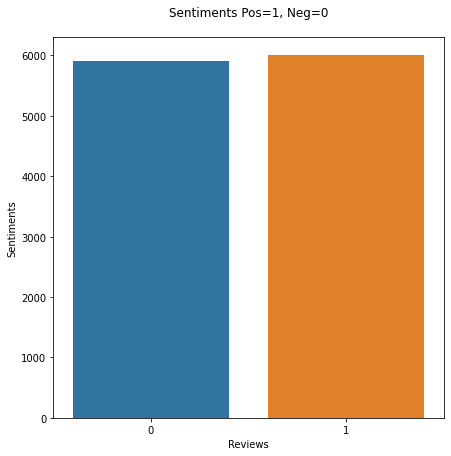

In [33]:
plt.figure(figsize=(7,7))

ax = sns.countplot(df.labels)
ax.set(xlabel='Reviews', ylabel='Sentiments')
ax.set_title("Sentiments Pos=1, Neg=0\n")
plt.show()

In [34]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopset = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
import string

docs_upd = []
for item in df.docs:
  data = item
  data_1 = [char for char in data if char not in string.punctuation]
  data_1=''.join(data_1)
  docs_upd.append(data_1)
df.docs = docs_upd
df.head()

labels                                               docs
0       0  i bought this album because i loved the title ...
1       0  i was misled and thought i was buying the enti...
2       0  i have introduced many of my ell  high school ...
3       1  anything you purchase in the left behind serie...
4       1  i loved these movies  and i cant wiat for the ...

In [36]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(df.docs)
print("\nVectorizer vocab:",vectorizer.vocabulary_)

vector = vectorizer.transform(df.docs)
print("\nTransformed Vector:",vector)

tfidf_transformer = TfidfTransformer().fit(vector)
print("\n",tfidf_transformer)

title_tfidf=tfidf_transformer.transform(vector)
print("\n",title_tfidf)


Vectorizer vocab: {'bought': 6982, 'this': 47870, 'album': 2798, 'because': 5633, 'loved': 28414, 'the': 47645, 'title': 48277, 'song': 44369, 'it': 25527, 'such': 46175, 'great': 21294, 'how': 23459, 'bad': 5069, 'can': 8187, 'rest': 40062, 'of': 33324, 'be': 5534, 'right': 40483, 'well': 52024, 'songs': 44383, 'are': 4011, 'just': 26239, 'filler': 18548, 'and': 3374, 'nt': 32979, 'worth': 52892, 'money': 31042, 'paid': 34549, 'for': 19260, 'either': 15932, 'shameless': 42782, 'bubblegum': 7529, 'or': 33839, 'oversentimentalized': 34357, 'depressing': 13352, 'tripe': 49064, 'kenny': 26449, 'chesney': 9229, 'is': 25454, 'popular': 36476, 'artist': 4202, 'as': 4232, 'result': 40104, 'he': 22377, 'in': 24214, 'cookie': 11257, 'cutter': 12341, 'category': 8634, 'nashville': 31908, 'music': 31634, 'scene': 41731, 'gotta': 21065, 'pump': 37910, 'out': 34068, 'albums': 2811, 'so': 44137, 'record': 39033, 'company': 10445, 'keep': 26408, 'lining': 27938, 'their': 47665, 'pockets': 36232, 'wh

In [37]:
y=df.labels
X=title_tfidf

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(9531, 53617)
(9531,)
(2383, 53617)
(2383,)


In [39]:
model = MultinomialNB().fit(X_train, y_train)

predictions = model.predict_proba(X_train)
print("Probability of trained class:",predictions)

predict_log = model.predict_log_proba(X_train)
print("\nLogarithmic Probability of trained class:",predict_log)

Probability of trained class: [[0.30352787 0.69647213]
 [0.11229484 0.88770516]
 [0.74957804 0.25042196]
 ...
 [0.76191293 0.23808707]
 [0.40556869 0.59443131]
 [0.41313595 0.58686405]]

Logarithmic Probability of trained class: [[-1.19228185 -0.3617275 ]
 [-2.18662733 -0.11911562]
 [-0.28824484 -1.38460796]
 ...
 [-0.271923   -1.43511882]
 [-0.90246503 -0.52015011]
 [-0.88397856 -0.53296209]]


In [40]:
y_pred = model.predict(X_test)
print(y_pred)

[0 1 1 ... 1 1 1]


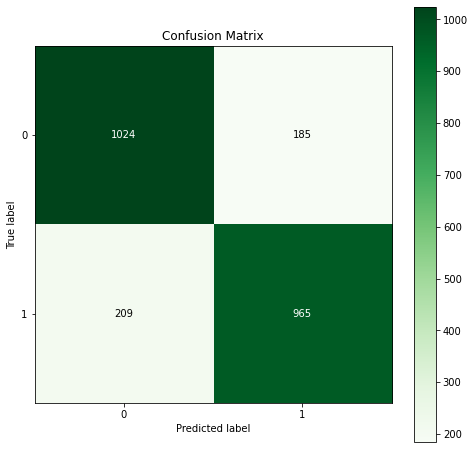

In [41]:
cm = confusion_matrix(y_test, y_pred)
! pip install -q scikit-plot
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(8,8),cmap='Greens')

In [42]:
from sklearn import metrics
acc=metrics.accuracy_score(y_pred,y_test)

print("Accuracy score:",round((acc*100),2))

Accuracy score: 83.47


In [44]:
from sklearn.model_selection import KFold, cross_val_score
n=KFold(n_splits=10)
scores = cross_val_score(model,X_train,y_train,cv=n)
for i in range(0, len(scores )):
  print("Cross validation for k={0}: {1: 0.3f}".format(i, scores[i]*100))

Cross validation for k=0:  82.704
Cross validation for k=1:  82.371
Cross validation for k=2:  82.896
Cross validation for k=3:  83.421
Cross validation for k=4:  81.532
Cross validation for k=5:  81.427
Cross validation for k=6:  82.896
Cross validation for k=7:  83.421
Cross validation for k=8:  82.791
Cross validation for k=9:  80.378
